<a href="https://colab.research.google.com/github/iAmirHosein92/Class_Exercise_Solution/blob/main/Exercises3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2. Import the dataset

In [3]:
apple_stock = pd.read_csv('appl_1980_2014.csv')
apple_stock.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 3. Assign it to a variable apple

In [4]:
apple = apple_stock

### Step 4.  Check out the type of the columns

In [5]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8465 non-null   object 
 1   Open       8465 non-null   float64
 2   High       8465 non-null   float64
 3   Low        8465 non-null   float64
 4   Close      8465 non-null   float64
 5   Volume     8465 non-null   int64  
 6   Adj Close  8465 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 463.1+ KB


### Step 5. Transform the Date column as a datetime type

In [6]:
apple['Date'] = pd.to_datetime(apple['Date'])

### Step 6.  Set the date as the index

In [7]:
apple = apple.set_index('Date')

### Step 7.  Is there any duplicate dates?

In [19]:
apple.index.duplicated().sum()

0

### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [20]:
apple = apple.sort_index()

In [23]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8465 entries, 1980-12-12 to 2014-07-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       8465 non-null   float64
 1   High       8465 non-null   float64
 2   Low        8465 non-null   float64
 3   Close      8465 non-null   float64
 4   Volume     8465 non-null   int64  
 5   Adj Close  8465 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 462.9 KB


### Step 9. Get the last business day of each month

In [26]:
apple.loc[apple.index.day == 31]

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,34.25,34.25,34.13,34.13,8937600,0.53
1981-03-31,24.75,24.75,24.50,24.50,3998400,0.38
1981-07-31,25.00,25.12,25.00,25.00,2738400,0.39
1981-08-31,20.13,20.25,20.13,20.13,10236800,0.31
1981-12-31,22.13,22.25,22.13,22.13,13664000,0.34
...,...,...,...,...,...,...
2013-07-31,454.99,457.34,449.43,452.53,80739400,63.12
2013-10-31,525.00,527.49,521.27,522.70,68924100,73.39
2013-12-31,554.17,561.28,554.00,561.02,55771100,79.23


### Step 10.  What is the difference in days between the first day and the oldest

In [70]:
apple.tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35


In [27]:
apple.index.max() - apple.index.min()

Timedelta('12261 days 00:00:00')

### Step 11.  How many months in the data we have?

In [72]:
apple.index.year.nunique() * 12

420

In [76]:
apple.index.year.nunique() * 12 - (12- (apple.index.max()).month)

415

### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

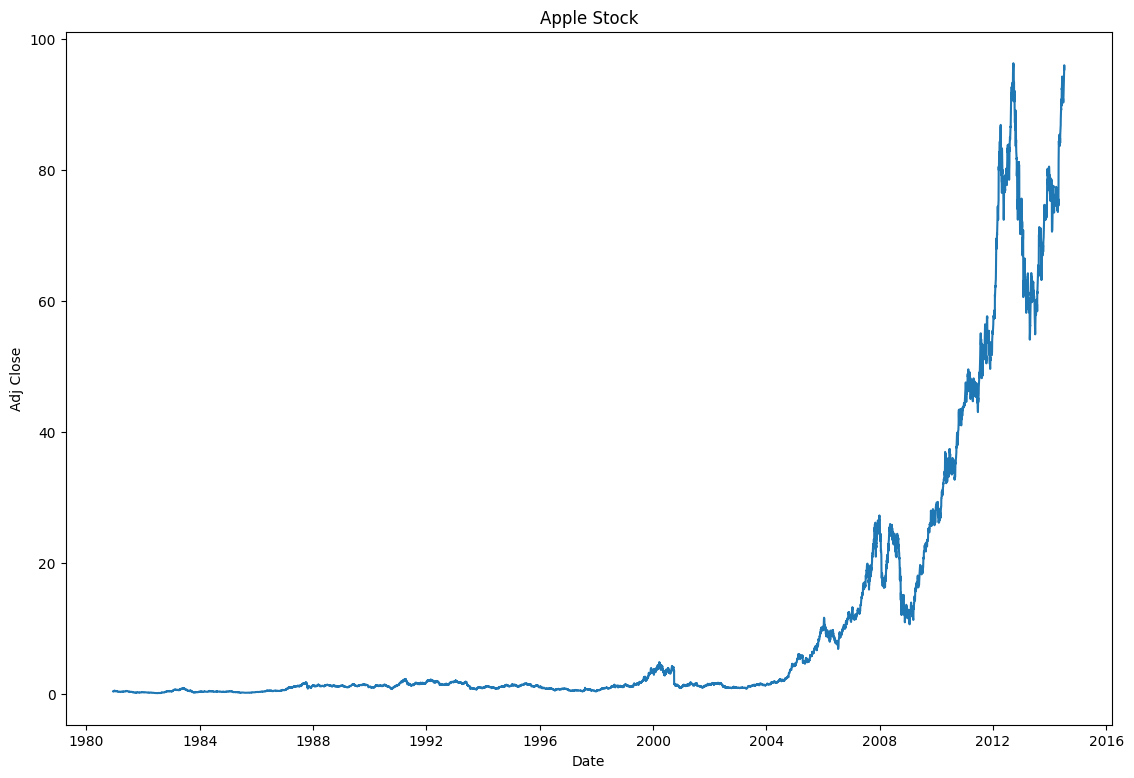

In [78]:
plt.figure(figsize=(13.5,9))
plt.plot(apple['Adj Close'])
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.title('Apple Stock')
plt.show()

### BONUS: Create your own question and answer it.

In [ ]:
# Calculate the daily percentage change
apple['Daily_Change_Pct'] = apple['Adj Close'].pct_change() * 100

In [81]:
apple.head()

,Open,High,Low,Close,Volume,Adj Close,Daily_Change_Pct
Date,,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45,NaN
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42,-6.666667
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39,-7.142857
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40,2.564103
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41,2.500000


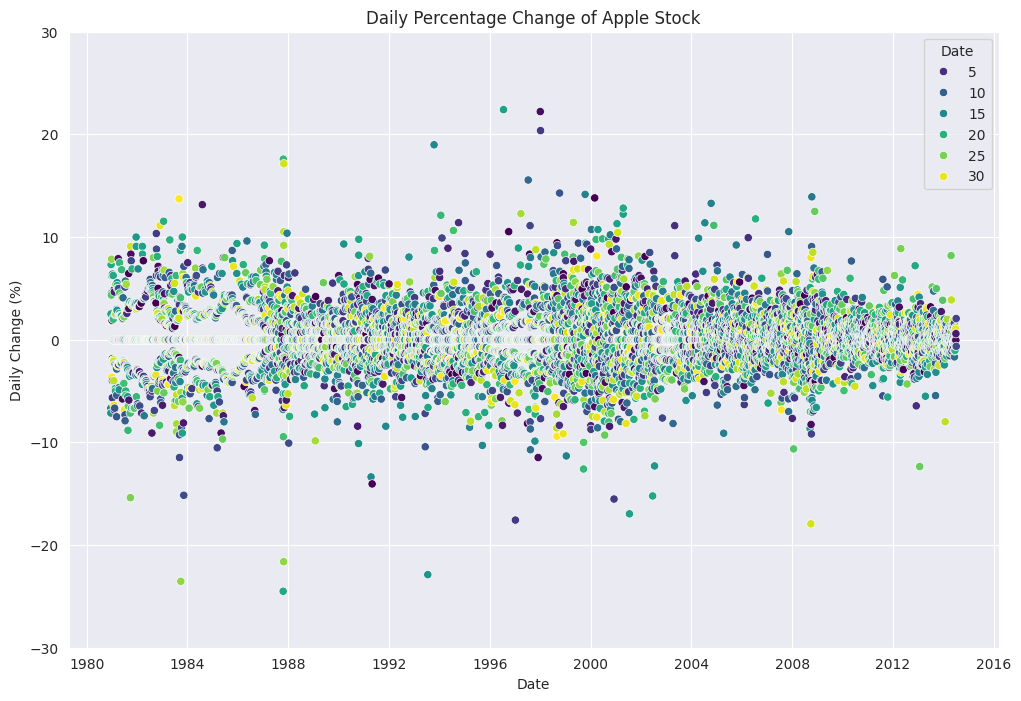

In [110]:
with sns.axes_style('darkgrid'):
  plt.figure(figsize=(12,8))
  sns.scatterplot(y=apple.Daily_Change_Pct, x=apple.index, hue=apple.index.day, palette='viridis')

  plt.xlabel('Date')
  plt.ylabel('Daily Change (%)')
  plt.ylim(-30,30)
  plt.title('Daily Percentage Change of Apple Stock')
  plt.show()

In [118]:
apple.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close',
       'Daily_Change_Pct'],
      dtype='object')

In [119]:
apple_new = apple.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1)

In [121]:
apple_new = apple_new.drop(['Adj Close'], axis=1)

In [122]:
apple_new.head()

,Daily_Change_Pct
Date,
1980-12-12,NaN
1980-12-15,-6.666667
1980-12-16,-7.142857
1980-12-17,2.564103
1980-12-18,2.500000


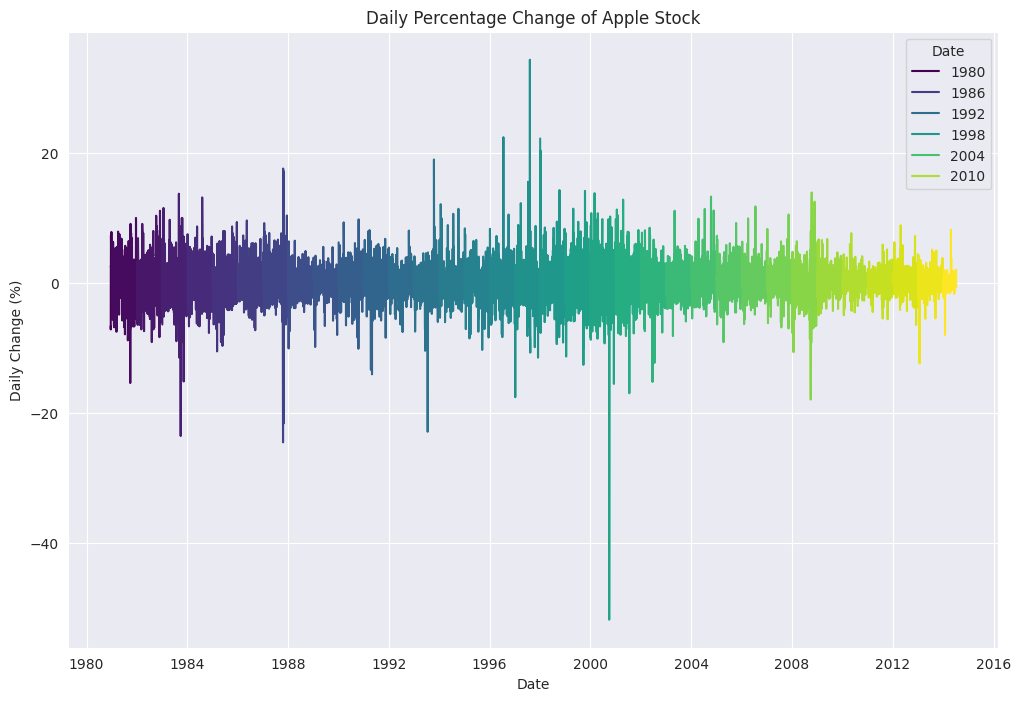

In [130]:
with sns.axes_style('darkgrid'):
  plt.figure(figsize=(12,8))
  sns.lineplot(y=apple.Daily_Change_Pct, x=apple.index, hue=apple.index.year,  palette='viridis')
  plt.title('Daily Percentage Change of Apple Stock')
  plt.xlabel('Date')
  plt.ylabel('Daily Change (%)')
  plt.show()